In [53]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model, model_selection
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, mean_squared_error, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [2]:
# load the given labels
breed = pd.read_csv('../data/breed_labels.csv')
color = pd.read_csv('../data/color_labels.csv')
state = pd.read_csv('../data/state_labels.csv')

In [3]:
original_df = pd.read_csv('../data/train.csv')

In [4]:
original_df

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6
5,2,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,"healthy and active, feisty kitten found in nei...",1,8
6,1,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,"For serious adopter, please do sms or call for...",1,10
7,2,2,265,0,3,1,6,7,1,2,2,2,3,1,7,0,41326,Hi Pet Lovers! This is my first posting and I ...,1,13
8,1,3,307,0,2,2,5,7,2,2,3,3,3,1,1,0,41401,"Lost Dog Found (Bandar Menjalara, Kepong／Taman...",2,14
9,1,78,218,205,1,1,7,0,2,2,3,3,3,1,1,0,41326,We moved out of our apartment to a landed home...,4,15


In [5]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [6]:
def transform_data(train_data_fname, test_data_fname):
    def transform_columns(df):
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    df = pd.get_dummies(df)
    # get train and test back
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    
    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy

In [7]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [116]:
XX.describe()

,Age,Fee,PID,Quantity,State,Breed1_Abyssinian,Breed1_Affenpinscher,Breed1_Airedale Terrier,Breed1_Akita,Breed1_American Bulldog,...,MaturitySize_S,MaturitySize_XL,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.0,4411.0,4411.000000,4411.000000,...,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,10.288143,22.339606,7541.519157,1.557017,41346.109272,0.001587,0.0,0.0,0.000227,0.000227,...,0.224666,0.002267,0.667196,0.126049,0.206756,0.464521,0.535479,0.493992,0.120381,0.385627
std,17.622193,78.454411,4369.698456,1.433674,32.531608,0.039809,0.0,0.0,0.015057,0.015057,...,0.417409,0.047565,0.471271,0.331942,0.405025,0.498796,0.498796,0.500021,0.325443,0.486798
min,0.000000,0.000000,1.000000,1.000000,41324.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3704.500000,1.000000,41326.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,7560.000000,1.000000,41326.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.000000,0.000000,11344.000000,1.000000,41401.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,255.000000,1000.000000,14990.000000,20.000000,41415.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

np.random.seed(14) 

In [31]:
#Entrenamos el modelo SGDclassifier
clf = SGDClassifier(max_iter=50, eta0=0.01)
clf.fit(X_train, y_train)  

C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
clf.score(X_train, y_train) 

0.20629134602403132

In [33]:
clf.fit(X_valid, y_valid)  

C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
clf.score(X_valid, y_valid) 

0.21921259842519686

In [49]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Usuario\Miniconda3\en

LR: 0.325369 (0.009916)


C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysi

LDA: 0.361144 (0.009865)
KNN: 0.253408 (0.015668)
CART: 0.300257 (0.016708)
NB: 0.324827 (0.014941)


C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Usuario\Minic

SVM: 0.281762 (0.007984)


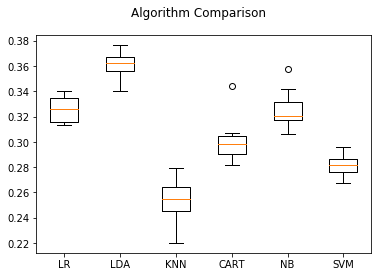

In [50]:
# Compare Algorithms
#Hacemos un gráfico con los resultados de evaluación de los modelos para comparar su distribución y la precisión media para 
#cada modelo (ya que se cada algoritmo se evalúa en 10 interacciones por el tipo de validación cruzada que hemos elegido).
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [112]:
#Una vez que sabemos cual es el mejor modelo predictivo para el conjunto de entrenamiento del dataset, lo que hacemos es aplicarlo
#sobre el conjunto de validación del dataset original. En este caso el mejor modelo, es decir el que tuvo mejor precisión fue: 


LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(XX)


C:\Users\Usuario\Miniconda3\envs\diplodatos\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [114]:
print(accuracy_score(y_valid, predictions))
print(confusion_matrix(y_valid, predictions))
print(classification_report(y_valid, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [3175, 4411]

In [117]:
predictions = LDA.predict(XX)

In [118]:
predicciones_df = pd.DataFrame(predictions, columns=['Pred'])
predicciones_df.head() # predicciones de las primeras 5 lineas

,Pred
0,4.0
1,2.0
2,4.0
3,4.0
4,1.0


In [119]:
predicciones_df.describe()

,Pred
count,4411.000000
mean,2.554296
std,1.156638
min,0.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,4.000000


In [122]:
yy = predictions.astype(np.int)

In [123]:
X.shape, XX.shape

((10582, 360), (4411, 360))

In [124]:
submission4 = pd.DataFrame(list(zip(XX.PID, yy.astype(np.int))), columns=["PID", "AdoptionSpeed"])

In [128]:
submission4.to_csv("../data/submission4.csv", header=True, index=False)

In [129]:
submission4['AdoptionSpeed'].value_counts()

2    1752
4    1452
1     713
3     414
0      80
Name: AdoptionSpeed, dtype: int64

In [130]:
submission4.describe()

,PID,AdoptionSpeed
count,4411.000000,4411.000000
mean,7541.519157,2.554296
std,4369.698456,1.156638
min,1.000000,0.000000
25%,3704.500000,2.000000
50%,7560.000000,2.000000
75%,11344.000000,4.000000
max,14990.000000,4.000000
